In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.patheffects as path_effects
import matplotlib.font_manager as fm
import matplotlib.colors as mcolors
from matplotlib import cm
from highlight_text import fig_text, ax_text
from matplotlib.colors import LinearSegmentedColormap, Normalize
from matplotlib import cm
import matplotlib.gridspec as gridspec
import numpy as np
import datetime
from scipy.constants import golden

from matplotlib.figure import Figure
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from PIL import Image
import urllib
import json
import os

font_path = "./assets/fonts"
for x in os.listdir(font_path):
    for y in os.listdir(f"{font_path}/{x}"):
        if y.split(".")[-1] == "ttf":
            fm.fontManager.addfont(f"{font_path}/{x}/{y}")
            try:
                fm.FontProperties(weight=y.split("-")[-1].split(".")[0].lower(), fname=y.split("-")[0])
            except Exception:
                continue

plt.style.use("./assets/stylesheets/soc_base.mplstyle")

In [3]:
df = pd.read_csv("./data/rose.csv", sep=",")
df

,Team,Data,Valore
0,Napoli,15/ago/2022,434.68
1,Juventus,15/ago/2022,518.90
2,Inter,15/ago/2022,610.00
3,Lazio,15/ago/2022,279.70
4,Milan,15/ago/2022,512.55
5,Roma,15/ago/2022,401.85
6,Atalanta,15/ago/2022,333.80
7,Fiorentina,15/ago/2022,249.75
8,Napoli,1/ott/2022,480.55
9,Juventus,1/ott/2022,502.40


In [4]:
team_map = {
    'team': [
        "Napoli",
        "Lazio",
        "Juventus",
        "Inter",
        "Atalanta",
        "Milan",
        "Roma",
        "Fiorentina",
    ],
    'fotmob_id':[
        9875,
        8543,
        9885,
        8636,
        8524,
        8564,
        8686,
        8535,
    ],
    'color':[
        "#88CCEE",
        "#44AA99",
        "#000000",
        "#2E23FF",
        "#006cb0",
        "#882255",
        "#95082a",
        "#46008b",
    ],
}



logos = pd.DataFrame(team_map)
logos

,team,fotmob_id,color
0,Napoli,9875,#88CCEE
1,Lazio,8543,#44AA99
2,Juventus,9885,#000000
3,Inter,8636,#2E23FF
4,Atalanta,8524,#006cb0
5,Milan,8564,#882255
6,Roma,8686,#95082a
7,Fiorentina,8535,#46008b


## Visual

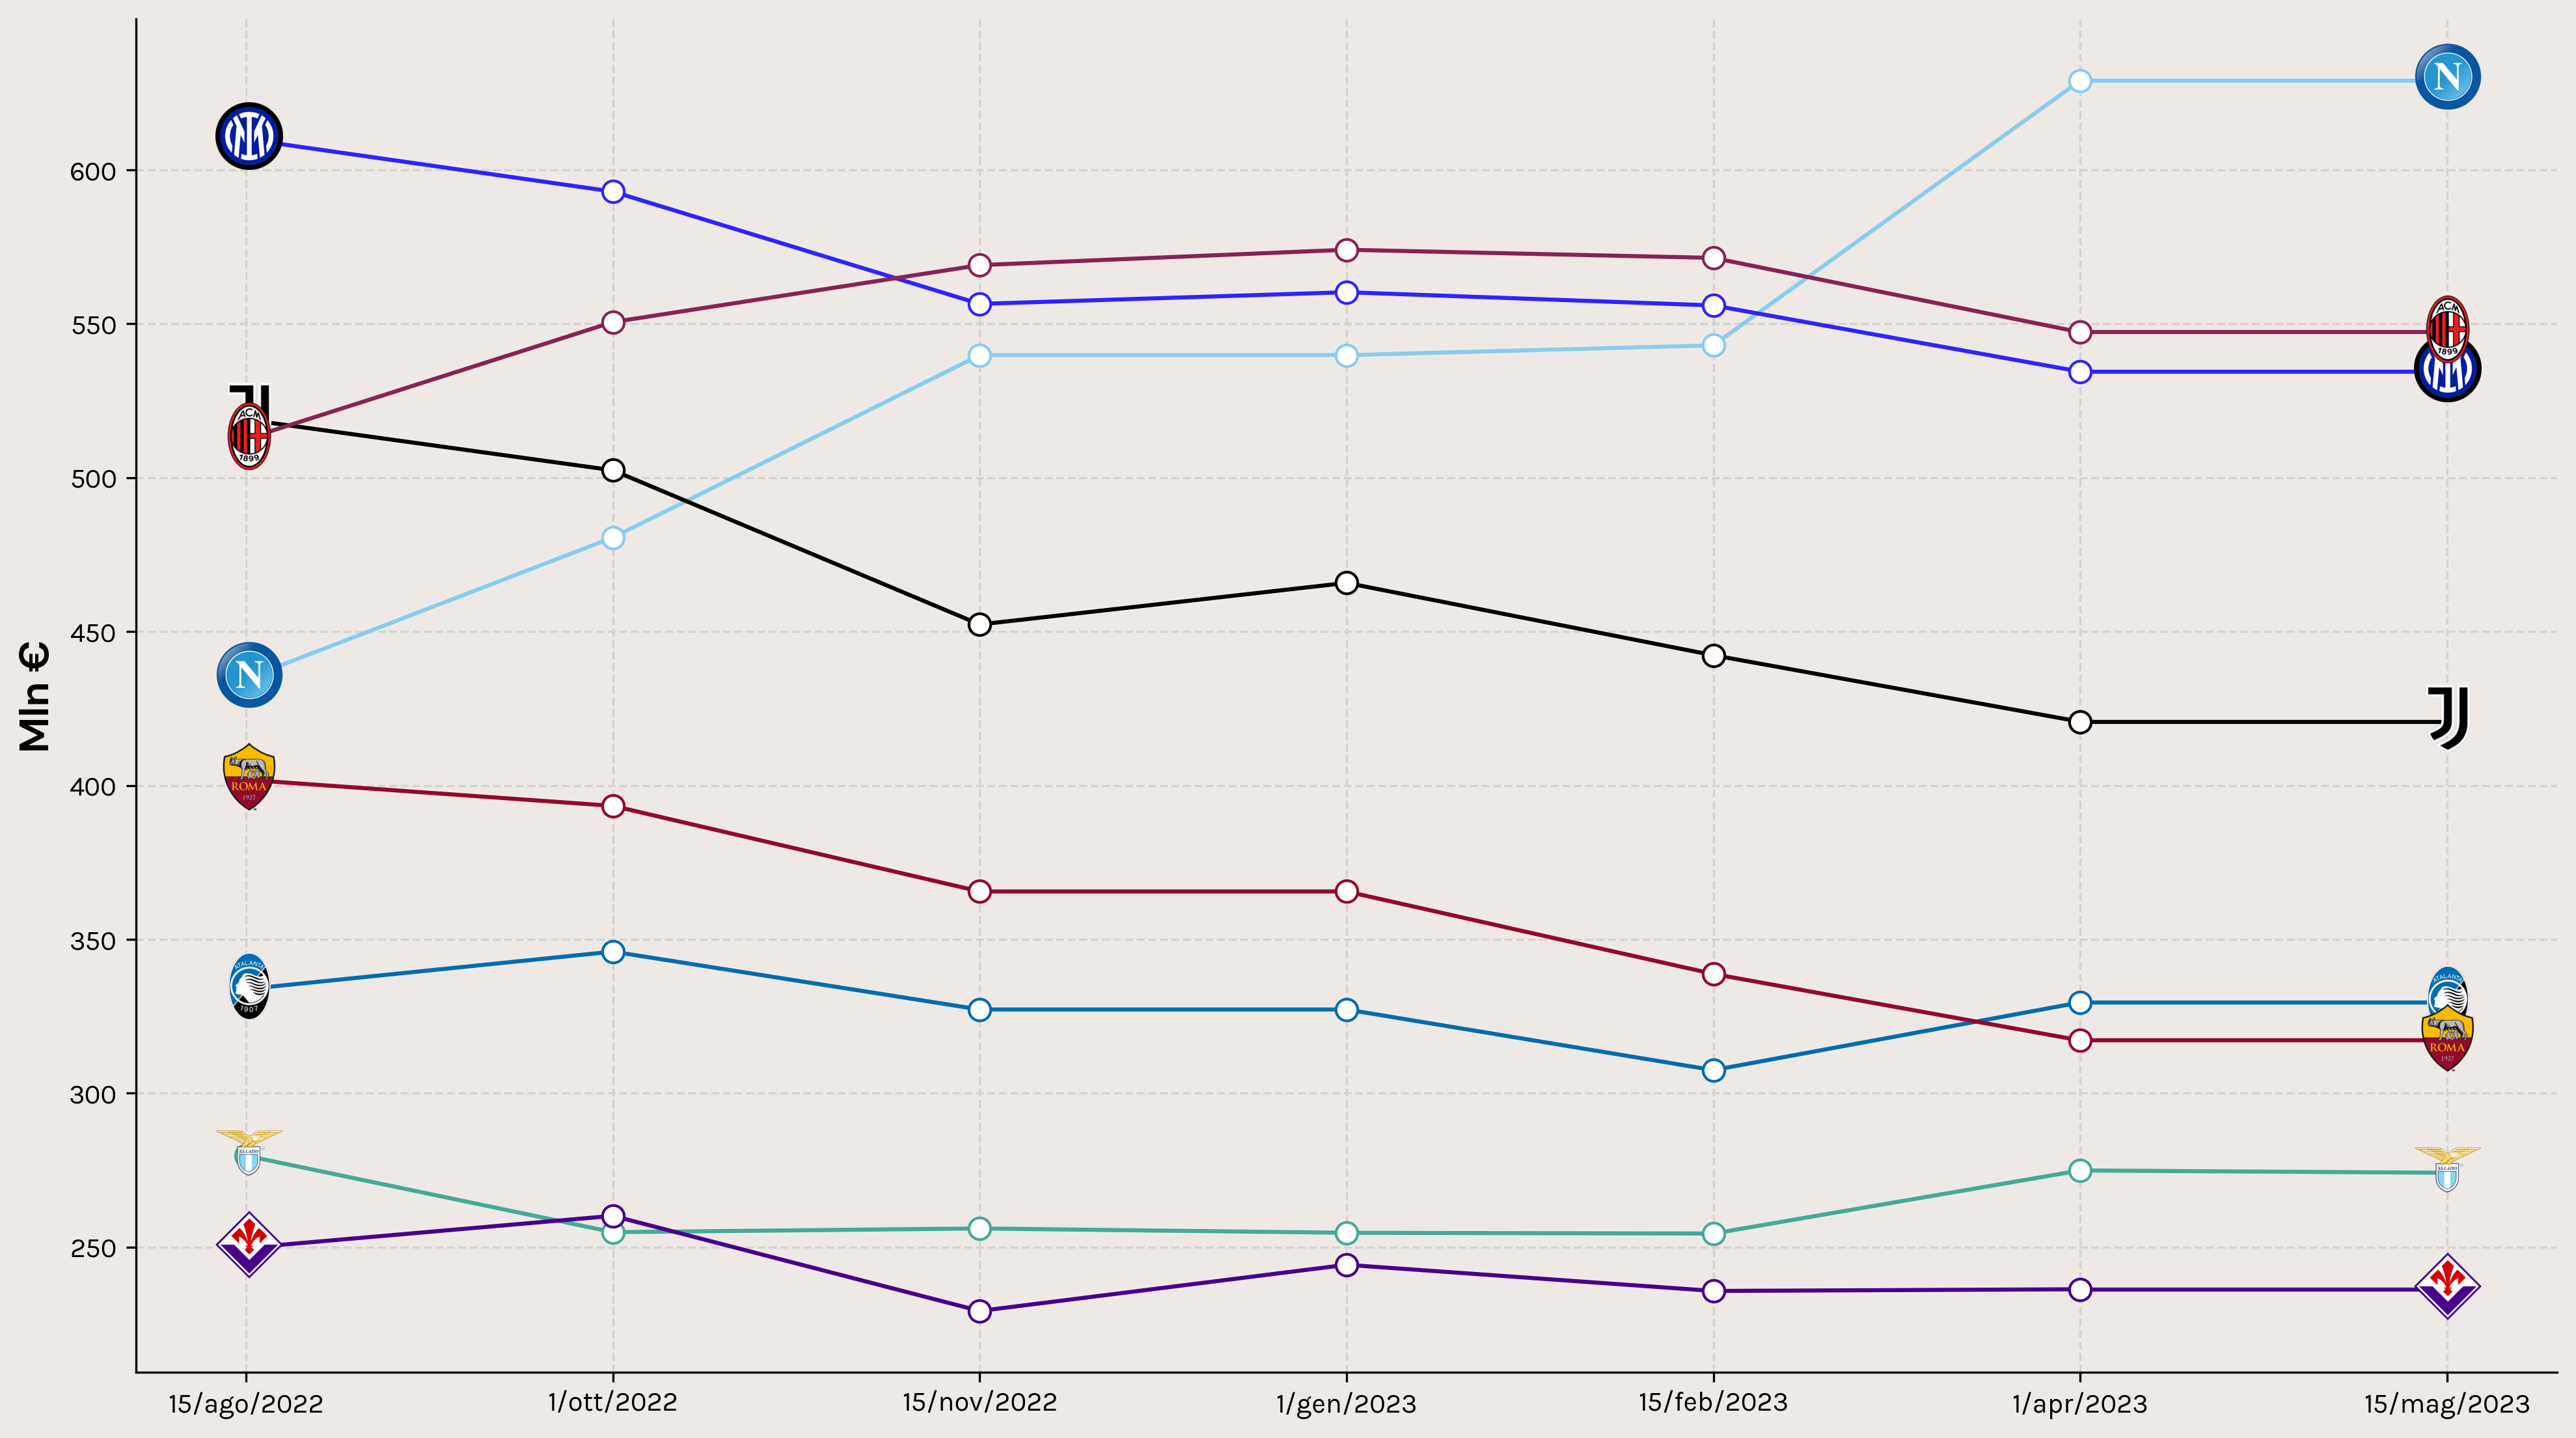

In [32]:
fig = plt.figure(figsize=(16, 9), dpi = 300)
ax = plt.subplot()
ax.grid(visible=True, ls='--', color='lightgrey')

ax.set_ylabel('Mln €', fontsize = 15, color = "black", font = "DM Sans", weight = "bold")

for t in logos[['team', 'color']].iloc:
    sub = df[df.Team == t.team]
    ax.plot(sub.Data[:-1], sub.Valore[:-1], marker='o', mfc='white', ms=8, color=t.color, zorder=4)
    ax.plot(sub.Data.iloc[-2:], sub.Valore.iloc[-2:], color=t.color)
    

norm = lambda x, lim: (x - lim[0])/(lim[1]-lim[0])

fotmob_url = 'https://images.fotmob.com/image_resources/logo/teamlogo/'
for t, i in logos[['team', 'fotmob_id']].iloc:
    club_icon = Image.open(urllib.request.urlopen(f'{fotmob_url}{i}.png')).convert('RGBA')
    
    x = df[df.Team == t].Valore.iloc[0]
    logo_init = ax.inset_axes([norm(1/7-0.3, ax.get_xlim()), norm(x-10, ax.get_ylim()), 0.05, 0.05])
    logo_init.imshow(club_icon)
    logo_init.axis('off')
    
    x = df[df.Team == t].Valore.iloc[-1]
    logo_end = ax.inset_axes([norm(5.837, ax.get_xlim()), norm(x-10, ax.get_ylim()), 0.05, 0.05])
    logo_end.imshow(club_icon)
    logo_end.axis('off')

plt.savefig(
	"figures/ValoreRosaSquadre.png",
	dpi = 600,
	facecolor = "#EFE9E6",
	bbox_inches="tight",
    edgecolor="none",
	transparent = False
)

plt.savefig(
	"figures/ValoreRosaSquadre_tr.png",
	dpi = 600,
	facecolor = "none",
	bbox_inches="tight",
    edgecolor="none",
	transparent = True
)